In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pylab as plt

In [7]:
df = pd.read_csv('data/parkinsonsdata.csv')

In [9]:
y = df['Age_of_disease_onset']
X = df.loc[:, df.columns != 'Age_of_disease_onset']
print(y.head(5))
print(X.head(5))

0    56
1    67
2    67
3    73
4    60
Name: Age_of_disease_onset, dtype: object
  Participant_code   Age Gender history  Duration_of_disease Antidepressant  \
0             PD01  58.0      F      No                    2             No   
1             PD02  68.0      F      No                    1             No   
2             PD03  68.0      M      No                    1             No   
3             PD04  75.0      M      No                    2             No   
4             PD05  61.0      M     Yes                  0.7             No   

  Antiparkinsonian_medication  Antipsychotic_medication  \
0                           No                       No   
1                           No                       No   
2                           No                       No   
3                           No                       No   
4                           No                       No   

  Benzodiazepine_medication  Levodopa_equivalent  ...  \
0                        No    

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.dtypes)

Participant_code                         object
Age                                     float64
Gender                                   object
history                                  object
Age_of_disease_onset                     object
 Duration_of_disease                     object
Antidepressant                           object
Antiparkinsonian_medication              object
Antipsychotic_medication                 object
Benzodiazepine_medication                object
Levodopa_equivalent                     float64
Clonazepam                              float64
motor_examination_HY                     object
motor_examination_UPDRS_III              object
Speech                                   object
Facial_Expression                        object
Tremor_at_Rest_head                      object
Tremor_at_Rest_RUE                       object
Tremor_at_Rest_LUE                       object
Tremor_at_Rest_RLE                       object
Tremor_at_Rest_LLE                      

In [12]:
df.shape

(171, 69)

In [13]:
columns_to_drop_indices = [65, 66, 67, 68] # Dropping the last four columns that are empty
df.drop(df.columns[columns_to_drop_indices], axis=1, inplace=True)

In [14]:
df.shape

(171, 65)

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.dtypes) # Checking to make sure 'Latency_of_respiratory_exchange_m' is the last column

Participant_code                         object
Age                                     float64
Gender                                   object
history                                  object
Age_of_disease_onset                     object
 Duration_of_disease                     object
Antidepressant                           object
Antiparkinsonian_medication              object
Antipsychotic_medication                 object
Benzodiazepine_medication                object
Levodopa_equivalent                     float64
Clonazepam                              float64
motor_examination_HY                     object
motor_examination_UPDRS_III              object
Speech                                   object
Facial_Expression                        object
Tremor_at_Rest_head                      object
Tremor_at_Rest_RUE                       object
Tremor_at_Rest_LUE                       object
Tremor_at_Rest_RLE                       object
Tremor_at_Rest_LLE                      

In [19]:
print(X.shape)
print(y.shape)

(171, 68)
(171,)


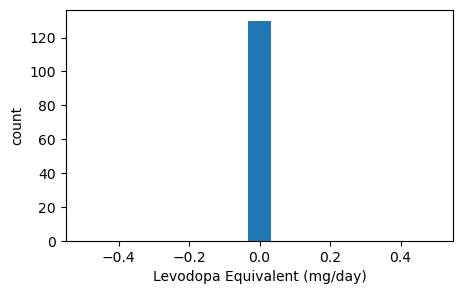

In [27]:
plt.figure(figsize=(5,3))

X['Levodopa_equivalent'].plot.hist(bins = 15)
                      
plt.xlabel('Levodopa Equivalent (mg/day)')
plt.ylabel('count')
plt.show()

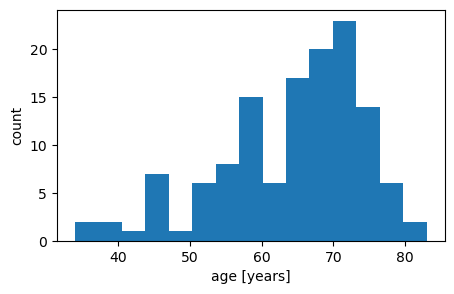

In [25]:
plt.figure(figsize=(5,3))

X['Age'].plot.hist(bins = 15)
                      
plt.xlabel('age [years]')
plt.ylabel('count')
plt.show()

In [88]:
nbins = 25
range1 = [[0, 100], [0, 500]]

heatmap, xedges, yedges = np.histogram2d(X['Age'], X['Rate_of_speech_timing_p'], bins=nbins, range=range1)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

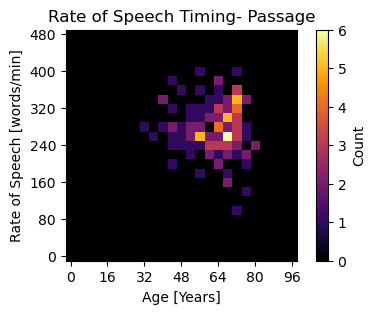

In [226]:
heatmap[heatmap == 0] = 0 
plt.figure(figsize=(5,3))

plt.imshow(heatmap.T, origin='lower',vmin=0, cmap='inferno') 
plt.xlabel('Age [Years]')
plt.ylabel('Rate of Speech [words/min]')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='Count')
plt.title('Rate of Speech Timing- Passage')
plt.show()

In [90]:
nbins = 25
range2 = [[0, 500], [0, 500]]

heatmap, xedges, yedges = np.histogram2d(X['Rate_of_speech_timing_m'], X['Rate_of_speech_timing_p'], bins=nbins, range=range2)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

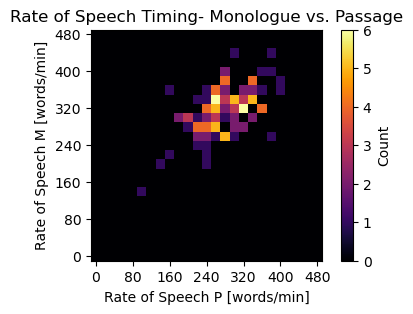

In [91]:
heatmap[heatmap == 0] = 0 
plt.figure(figsize=(5,3))

plt.imshow(heatmap.T, origin='lower',vmin=0, cmap='inferno') 
plt.xlabel('Rate of Speech P [words/min]')
plt.ylabel('Rate of Speech M [words/min]')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='Count')
plt.title('Rate of Speech Timing- Monologue vs. Passage')
plt.show()

In [92]:
nbins = 25
range1 = [[0, 100], [0, 500]]

heatmap, xedges, yedges = np.histogram2d(X['Age'], X['Rate_of_speech_timing_m'], bins=nbins, range=range1)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

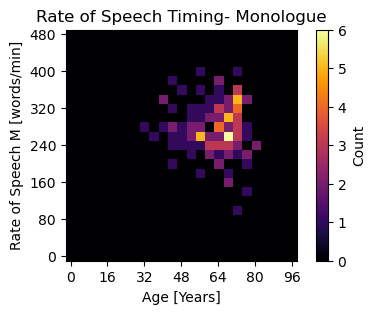

In [201]:
heatmap[heatmap == 0] = 0 
plt.figure(figsize=(5,3))

plt.imshow(heatmap.T, origin='lower',vmin=0, cmap='inferno') 
plt.xlabel('Age [Years]')
plt.ylabel('Rate of Speech M [words/min]')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='Count')
plt.title('Rate of Speech Timing- Monologue')
plt.show()

In [98]:
df.replace('-', np.NaN, inplace=True) #Null values have '-' in the dataset, 
# this is mostly for the third class of patients that were considered 'Healthy'

In [101]:
count_matrix = df.groupby(['Gender', ' Duration_of_disease']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

 Duration_of_disease  0.5  0.7     1   10   11   12   15   16   17    2  2.3  \
Gender                                                                         
F                     NaN  NaN   5.0  NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN   
M                     1.0  1.0  19.0  3.0  3.0  1.0  1.0  2.0  1.0  7.0  1.0   

 Duration_of_disease  2.5    3    4    5    6    7    8    9  
Gender                                                        
F                     1.0  1.0  1.0  3.0  NaN  1.0  1.0  NaN  
M                     NaN  7.0  3.0  6.0  2.0  1.0  2.0  1.0  
 Duration_of_disease       0.5       0.7         1        10        11  \
Gender                                                                   
F                          NaN       NaN  0.277778       NaN       NaN   
M                     0.016129  0.016129  0.306452  0.048387  0.048387   

 Duration_of_disease        12        15        16        17         2  \
Gender                                                  

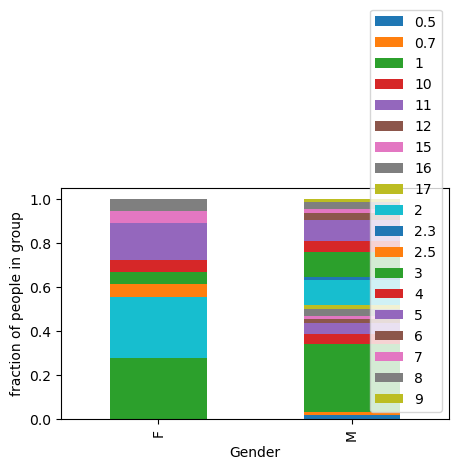

In [102]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [103]:
count_matrix = df.groupby(['Gender', 'Antidepressant']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Antidepressant    No  Yes (Anafranil)  Yes (Asentra)  Yes (Aurorix)  \
Gender                                                                
F               24.0              NaN            NaN            1.0   
M               96.0              1.0            1.0            NaN   

Antidepressant  Yes (Cipralex)  Yes (Citalec)  Yes (Remood)  Yes (Trittico)  \
Gender                                                                        
F                          1.0            NaN           NaN             NaN   
M                          NaN            1.0           1.0             1.0   

Antidepressant  Yes (Velaxin)  Yes (Zoloft)  
Gender                                       
F                         1.0           NaN  
M                         NaN           2.0  
Antidepressant        No  Yes (Anafranil)  Yes (Asentra)  Yes (Aurorix)  \
Gender                                                                    
F               0.888889              NaN            NaN       0

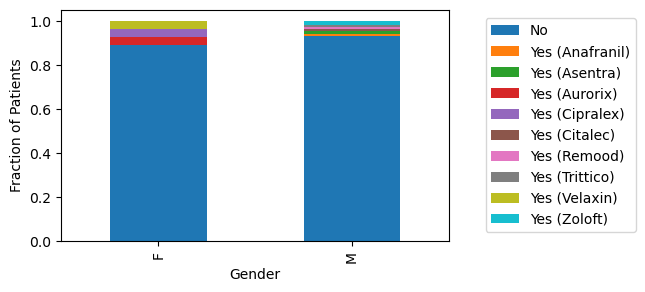

In [119]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction of Patients')
plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5))
plt.show()

In [124]:
import seaborn as sns

<Axes: xlabel=' Duration_of_disease', ylabel='Age'>

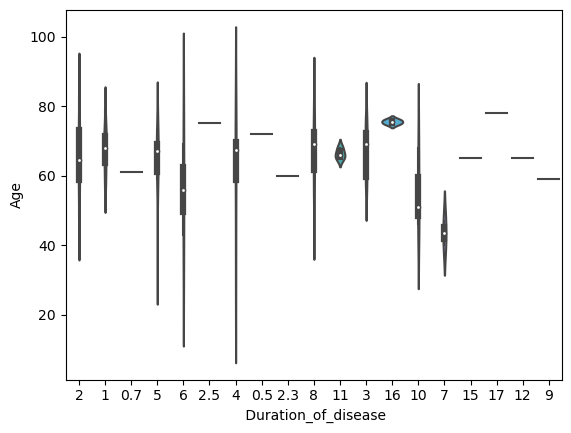

In [125]:
sns.violinplot(x=df[' Duration_of_disease'], y=df['Age'], data=X)

In [149]:
median_value = df[' Duration_of_disease'].median()

# Print the median value
print(f"Median of 'Duration of Disease': {median_value}")

Median of 'Duration of Disease': 2.75


In [172]:
df['Duration_category'] = df[' Duration_of_disease'].astype(float).apply(lambda x: '<=10' if x <= 10 else '>10')

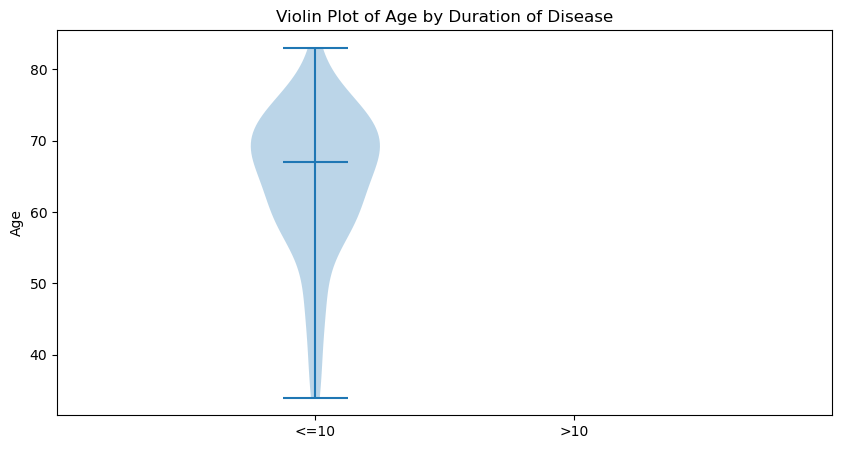

In [185]:
under_10 = df[df['Duration_category'] == '<=10']['Age'].values
over_10 = df[df['Duration_category'] == '>10']['Age'].values
none = df[df['Duration_category'] == 'NaN']['Age'].values

plt.figure(figsize=(10, 5))
plt.violinplot(dataset=[under_10], showmedians=True, positions=[1])
plt.xticks([1, 2], ['<=10', '>10'])
plt.ylabel('Age')
plt.title('Violin Plot of Age by Duration of Disease')
plt.xlim(0, 3)
plt.show()

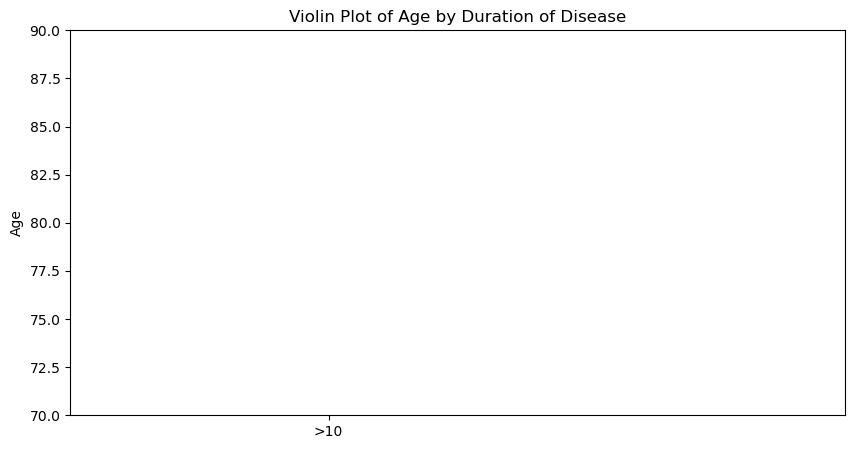

In [189]:
under_10 = df[df['Duration_category'] == '<=10']['Age'].values
over_10 = df[df['Duration_category'] == '>10']['Age'].values
none = df[df['Duration_category'] == 'NaN']['Age'].values

plt.figure(figsize=(10, 5))
plt.violinplot(dataset=[over_10], showmedians=True, positions=[1])
plt.xticks([1], ['>10'])
plt.ylabel('Age')
plt.title('Violin Plot of Age by Duration of Disease')
plt.xlim(0, 3)
plt.ylim(70, 90)
plt.show()

In [174]:
category_counts = df['Duration_category'].value_counts()
print(category_counts)

Duration_category
>10     99
<=10    72
Name: count, dtype: int64


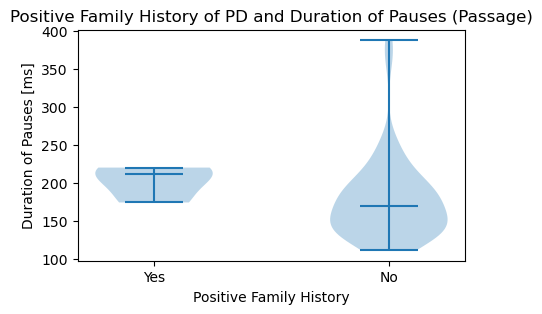

In [203]:
dataset = [df[df['history']=='Yes']['Duration_ of_pause_intervals_p'].values,
           df[df['history']=='No']['Duration_ of_pause_intervals_p'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset,showmedians=True)
plt.xticks([1,2],['Yes','No'])
plt.ylabel('Duration of Pauses [ms]')
plt.xlabel('Positive Family History')
plt.title('Positive Family History of PD and Duration of Pauses (Passage)')
plt.show()

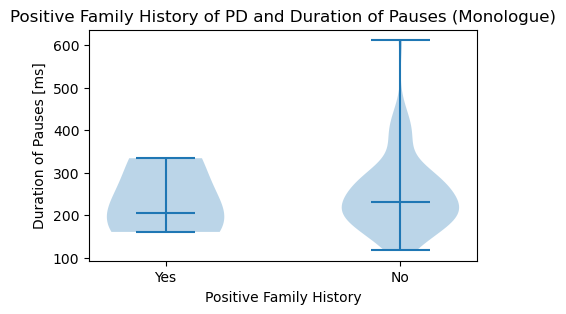

In [202]:
dataset = [df[df['history']=='Yes']['Duration_of_pause_intervals_m'].values,
           df[df['history']=='No']['Duration_of_pause_intervals_m'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset,showmedians=True)
plt.xticks([1,2],['Yes','No'])
plt.ylabel('Duration of Pauses [ms]')
plt.xlabel('Positive Family History')
plt.title('Positive Family History of PD and Duration of Pauses (Monologue)')
plt.show()

In [205]:
df['FirstTwo'] = df['Participant_code'].str[:2]

In [213]:
grouped = df.groupby(df['Participant_code'].str[:2])

for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data.shape)

Group: HC
(50, 67)
Group: PD
(30, 67)
Group: RB
(50, 67)


In [217]:
from sklearn.model_selection import train_test_split 

In [220]:
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state = random_state,stratify)
print('training set:',X_train.shape, y_train.shape)
print(X_other.shape, y_other.shape)

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

training set: (102, 68) (102,)
(69, 68) (69,)
validation set: (34, 68) (34,)
test set: (35, 68) (35,)


In [222]:
grouped = df.groupby(X_train['Participant_code'].str[:2])
for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data.shape)

Group: HC
(32, 67)
Group: PD
(15, 67)
Group: RB
(30, 67)


In [223]:
grouped = df.groupby(X_test['Participant_code'].str[:2])
for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data.shape)

Group: HC
(11, 67)
Group: PD
(9, 67)
Group: RB
(7, 67)


In [224]:
grouped = df.groupby(X_val['Participant_code'].str[:2])
for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data.shape)

Group: HC
(7, 67)
Group: PD
(6, 67)
Group: RB
(13, 67)


In [225]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (171, 67)
fraction of missing values in features:
Participant_code                        0.239766
Age                                     0.239766
Gender                                  0.239766
history                                 0.532164
Age_of_disease_onset                    0.532164
 Duration_of_disease                    0.532164
Antidepressant                          0.239766
Antiparkinsonian_medication             0.239766
Antipsychotic_medication                0.239766
Benzodiazepine_medication               0.239766
Levodopa_equivalent                     0.239766
Clonazepam                              0.239766
motor_examination_HY                    0.824561
motor_examination_UPDRS_III             0.532164
Speech                                  0.532164
Facial_Expression                       0.532164
Tremor_at_Rest_head                     0.532164
Tremor_at_Rest_RUE                      0.532164
Tremor_at_Rest_LUE                      0.532164
Tr